<a id='top'></a>

# CSCI3022 S22



# Homework 3: Stochastic Simulation

## Due Monday, February 21 at 11:59 pm to Canvas and Gradescope
***

**Name**: Matthew Su

***

Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own**.

**NOTES**: 

- Any relevant data sets should be available on Canvas. To make life easier on the graders if they need to run your code, do not change the relative path names here. Instead, move the files around on your computer.
- If you're not familiar with typesetting math directly into Markdown then by all means, do your work on paper first and then typeset it later.  Here is a [reference guide](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) linked on Canvas on writing math in Markdown. **All** of your written commentary, justifications and mathematical work should be in Markdown.  I also recommend the [wikibook](https://en.wikibooks.org/wiki/LaTeX) for LaTex.
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do **Kernel $\rightarrow$ Restart & Run All** as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code. 
- 45 points of this assignment are in problems.  The remaining 5 are for neatness, style, and overall exposition of both code and text.
- This probably goes without saying, but... For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit. 
- There is *not a prescribed API* for these problems.  You may answer coding questions with whatever syntax or object typing you deem fit.  Your evaluation will primarily live in the clarity of how well you present your final results, so don't skip over any interpretations!  Your code should still be commented and readable to ensure you followed the given course algorithm.
- There are two ways to quickly make a .pdf out of this notebook for Gradescope submission.  Either:
 - Use File -> Download as PDF via LaTeX.  This will require your system path find a working install of a TeX compiler
 - Easier: Use File ->  Print Preview, and then Right-Click -> Print using your default browser and "Print to PDF"



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import scipy.stats as stats
%matplotlib inline


---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Problem 3](#p3) |
---


***
<a/ id='p1'></a>
[Back to top](#top)
## (15 pts) Problem 1: It's a duel!
***

Brennan and Dale are back to their competitions.  They've discovered a new sport: Baseball!  But it's hard to play with only 2 of them, so they instead have a simplifed variant of a game with the following properties:

- Dale gets one attempt to hit a pitch thrown by Brennan.  He succeeds with with probability $p$.
- Brennan gets one attempt to hit a pitch thrown by Dale.  He succeeds with with probability $q$.
- If one of them succeeded and the other didn't, the one that succeeded is the winner!
- If neither succeeded **OR** neither failed, the game continues from the start.

(NB: this is similar to e.g. [Horse](https://en.wikipedia.org/wiki/NBA_All-Star_Weekend_H%E2%80%93O%E2%80%93R%E2%80%93S%E2%80%93E_Competition) in basketball)

Denote the following:
- D is the event that Dale wins the game at the end.
- B is the event that Brennan wins the game at the end.
- E is the event that the game ends in the first round.
- C is the event that the game continues to additional rounds.



**A**: The duel will continue until Dale or Brennan wins.  What is the sample space $\Omega$ for this "experiment"?  Represent the outcomes of individual pitches by $H$ for a successful hit and $W$ for a failure (whiff). Assume that Dale has the first attempt to hit in each round. At the very least, your answer should include all of the events in $\Omega$ that include one or two rounds.

Essentially it will take at minimum 1 round to determine a winner. 

This can happen as:

- "DH and BW" or "DW and BH"

Ties occur when:

- "DH and BH" or "DW and BW"

When a tie occurs, another round is required to see if anyone wins again.

At this point then, a win/loss looks like:

- "DH and BH" followed by "DH and BW"

- "DH and BH" followed by "DW and BH"

- "DW and BW" followed by "DH and BH"

- "DW and BW" followed by "DW and BH"

This continues round to round until someone wins.

Overall for a 2 round limit it looks as follows:

- "DH and BW"
- "DW and BH"
- "DH and BH"
- "DW and BW"
- "DH and BH" followed by "DH and BW"

- "DH and BH" followed by "DW and BH"

- "DW and BW" followed by "DH and BH"

- "DW and BW" followed by "DW and BH"

**B:** Determine $P(D \mid E)$ in terms of $p$ and $q$.

We are aware that D (the event that Dale wins the game) is the same as his success probability of hitting the pitch first and the probability that Brennan fails. For Brennan, it's the opposite (his success probability and the probability that Dale fails).

This can be represented as:

$$P(D) = p * (1-q) $$  <br>


When we break down $P(D \mid E)$ (conditional probability):
$$
P(D \mid E) = \dfrac{P(D \cap E)}{P(E)}
$$

$P(E)$ can only occur if one person wins and one person loses, represented as $p(1-q), q(1-p)$ for Dale and Brennan 

<br>
$$
P(D \mid E) = \dfrac{p(1-q)}{p(1-q) + q(1-p)}
$$



**C**: Explain why events $C$ and $D$ are independent (words/intuition are fine!)

The event that the game requires one more round (C) does not depend on Dale winning (D), but rather Dale winning AND Brennen losing. P(C) represents the scenerio where D and B either both hit the ball or both whiff.

**D**: Use the Law of Total Probability to show that $P(D) = p(1-q) + (2pq - p - q +1) P(D \mid C)$.

$P(C)$ is representative of the probability of either all hits or all whiffs:

$$P(C) = (1-q)(1-p) + pq = (2pq-p-q+1)$$

And we know that $P(D \mid E)$ is $\dfrac{p(1-q)}{P(E)}$, so multiplying it by $P(E)$ cancels it out leaving only the numerator $p(1-q)$: 

$$P(D) = P(D \mid E) * P(E) + P(D \mid C) * P(C)$$





 


**E**: Use the fact from **Part C** that $P(D \mid C) = P(D)$ to determine $P(D)$ in terms of $p$ and $q$. 

$$P(D) = (p * (1-q)) + (2pq-p-q+1)P(D)$$

$$-p(1-q) = -P(D) + (2pq-p-q+1)P(D)$$

$$p(1-q) = P(D)(1-2pq+p+q-1)$$

$$P(D) = \dfrac{p(1-q)}{(-2pq+p+q)}$$

**Part F (2 Points)**: Explain why the answers to **Part B** and **Part E** are the same. 

The relationship between $P(D \mid E)$ and $P(D \mid C)$ is that the probability of either a 1st round exit or a continuation of rounds is directly dependent on the win probability of either D or B (which are interdependent on each other). Trying to find the probability of either event moving on or a one round exit isn't possible with just D's win probability since D winning does not incur either event without B losing. The odds of a win situation versus a tie/whiff situation are the same between E and C, but are not accounted for in $P(D \mid E)$ nor $P(D \mid C)$ since they only look at D's chance of winning, which is same round to round regardless of E or C.

[Back to top](#top)

<a id='p2'></a>

## (15 pts) Problem 2 (Simulation): Poker and games
***

One of the big payoffs of simulation is that it can let us answer some probability questions that are otherwise quite difficult.  We can instead just simulate the process and get approximate results based on simulation.


A common example for discrete counting and probability questions are poker hands.  Consider using a standard 52-card playing deck, with card faces `[A,2,3,4,5,6,7,8,9,10,J,Q,K]` across the standard 4 suits: `[C,D,H,S]`.

Suppose we draw 5 cards at random from the deck.

**A:** What is the exact probability that we have "three of a kind:" a hand with 3 copies of one card face type (of any suits) and the other two cards not matching either that face or each other. Typeset your work below.  You may leave your answer in terms of a ratio of products, but you should simplify away any combinatoric notation such as ${n \choose k}$ or $P(n,k)$.


There are 13 possible faces to have a ToaK, and 12 remaining values avaliable for the next 2 picks after the face is selected and the number of unique cards (3) required to make up that Toak out of the 4 cards that exist in the deck with the same face.


Three of a Kind $
 = (\dfrac{13}{1}) * (\dfrac{12}{2}) * (\dfrac{4}{3})
$


Each additional card choice is represented as  $ (\dfrac{4}{1})$

Thus our final probability is:

Three of a Kind $
 = (\dfrac{13}{1}) * (\dfrac{12}{2}) * (\dfrac{4}{3}) * (\dfrac{4}{1})^2
$ 

Which roughly equates to ~2%





**B:**
Poker with computers!

Write a simulation that draws a hand of 5 cards from a standard 52-card deck. Repeat this simulation 10000 times, and report how many "three of a kind" hands were observed. Verify that the result is consistent with your answer to part A.

NB: The function `np.unique` can make checking hands easier.  Your actual simulation should have 52 distinct cards, even if we're only using the faces (and not suits) for the check of the final hand.

In [21]:
from random import sample

# All the different faces in a deck of cards
faces = ['A','1','2','3','4','5','6','7','8','9','10','J','Q','K']

#Global variable to store number of Toaks
Toak = 0

#run though 10000 hand scenerios
for i in range (10000):
    # array to store user hand
    hand = []
    # number of each cards/faces avaliable
    cardcount = []
    # 'A','A','A','A','1','2':4,'3':4,'4':4,'5':4,'6':4,'7':4,'8':4,'9':4,'10':4,'J':4,'Q':4,'K':4
    
    for j in range (len(faces)):
        cardcount.extend([faces[j] for k in range(4)])
    
    
    hand = sample(cardcount, 5)
    
    if (max(np.unique(hand,return_counts=True)[1]) == 3):
        Toak += 1
    else:
        continue
        

print("Three of a kind probability: ", Toak/10000)
        
        
        

Three of a kind probability:  0.0184


[Back to top](#top)

<a id='p3'></a>

## (15 pts) Problem 3 (Simulation): Is it fair?
***

Hopefully you enjoyed the Super Bowl, which (again) this year tragically did not involve the Detroit Lions.  One narrative that is often discussed in the NFL playoffs is whether or not overtime - the way games tied after 4 quarters are handled -  is *fair*.  The general rules of an NFL overtime are as follows:

- The teams alternate who gets the ball to try to score.  The team that wins the coin toss gets to try first.
- The game is over whenever a team scores, and that team is the winner.  There are two exceptions to this rule, listed in the next bullet point.
- If the first team (Team 0) scores a "Field Goal," the other team has a chance to get the ball.  In this case, if the other team (Team 1) scores a "Touchdown" they win, if Team 1 scores a "Field Goal," the game continues but reverts to next-score-wins, and if Team 1 failes to score they lose.
- The game ends at a tie (in the regular season) if neither team scores at all within 10 minutes.  The game is also a tie if they each scored Field Goals in their first drives and then no scores followed in an overall duration of 10 minutes.  It's also possible for Team 0 to win by scoring a Field Goal and having the clock run out during Team 1's subsequent drive.

We're going to *simulate* NFL overtimes to determine whether or not they're fair!  Note that in theory this **should** be a similar to problem 1: if $p=q=.5$ in the dueling problem, you should be able to quickly compute that both Dale and Brennan would be equally likely to win.  But the NFL rules are a little different, and not every scenario involves both teams getting an equal number of chances...

To simulate NFL overtimes, we're going to simulate **drives** of each team.  These is the outcomes of each of their turns to have the ball.  In particular, we'll assume each and every drive follows the (simplified) probabilities given by the approximate NFL average for drives:

- A drive has 30% chance to end in a Touchdown.
- A drive has 1/6 chance to end in a Field Goal.
- All other drives end in no points and the other team getting the ball.
- The **duration** of drives is an exponential random variable with average length of 2.4 minutes (`scale=2.4`) .


**Implementation Comments**:

-- You'll probably want various if-then statements to describe what happens if the time runs out

-- Make sure your function returns either the total number of possessions or the possessions themselves, since you'll be asked about them!

-- If the rules are at all confusing, they're in slightly more depth [here](https://operations.nfl.com/the-rules/nfl-overtime-rules/)

In [2]:
drive ={'drives' : np.array(["TD", "FG", "TO"]), 'probs' : np.array([3/10, 1/6, 16/30])} 

def sim_overtime():
    time=0 #maybe increment this each drive
    
    #H and T represent a team (winner of coin toss, not literally heads or tails)
    
    coin = np.array(["H", "T"])
    
    ct = np.random.choice(coin)
    
    numposs = 1
    
    fgh = 0
    fgt = 0
    
    #for each possession:
        #check if the time has run out?  If not...
        #record what happened: TD, FG, or no point
        #check if the game is over based on points being scored?
        
    while time < 10:
        intime = time + np.random.exponential(scale=2.4)
        
        # I wanted the time first to determine how much time a team takes on a drive first,
        # then determining the outcome as a result. I felt that determining an outcome then
        # calculating a time was not representative of what happens in an actual game,
        # so this approach limits my poss quite a bit but in a more realistic way, as in 
        # actual games you don't really get more than 4 drives during overtime
        
        if intime < 10:
            time = intime
            dout = np.random.choice(drive['drives'], p=drive['probs'])
            
            if ct == "H":
                if dout == "TD":
                    winner = ct
                    possessions = numposs 
                    break
                elif dout == "FG":
                    # no one scored a FG yet (MP)
                    if (fgh == 0) and (fgt == 0):
                        fgh = 1
                        numposs+=1
                        continue
                    # H scores a fg, T already scored a fg (MP)
                    elif (fgh == 0) and (fgt == 1):
                        fgh = 0
                        fgt = 0
                        numposs+=1
                        continue
                    # H already scored, H scores again (W)
                    elif (fgh == 1) and (fgt == 0):
                        winner = ct
                        possessions = numposs
                        break
                else:
                    ct = "T"
                    continue
            else:
                if dout == "TD":
                    winner = ct
                    possessions = numposs 
                    break
                elif dout == "FG":
                    # no one scored a FG yet (MP)
                    if (fgh == 0) and (fgt == 0):
                        fgt = 1
                        numposs+=1
                        continue
                    # T scores a fg, H already scored a fg (MP)
                    elif (fgh == 1) and (fgt == 0):
                        fgh = 0
                        fgt = 0
                        numposs+=1
                        continue
                    # T already scored, H scores again (W)
                    elif (fgh == 0) and (fgt == 1):
                        winner = ct
                        possessions = numposs
                        break
                    else:
                        ct = "H"
                        continue
                    
                        
        else:
            if fgh == 1 and fgt == 0:
                winner = "H"
                possessions = numposs
                break
            elif fgh == 0 and fgt == 1:
                winner = "T"
                possessions = numposs
                break
            else:
                winner = "TIE"
                possessions = numposs
                break
                    
    return winner, possessions

def results(num_samples):
    results = np.array([sim_overtime() for ii in range(num_samples)])
    print("Team 0 win prob: ", np.sum(results == "H")/num_samples)
    print("Team 1 win prob: ", np.sum(results == "T")/num_samples)
    print ("Ties: ", np.sum(results == "TIE")/num_samples)


In [3]:
results(1000)


Team 0 win prob:  0.212
Team 1 win prob:  0.639
Ties:  0.149


**B**:  Run your function in Part **A** at least 1000 times.  Make sure to save (in one or more objects) both the win/lose/tie status of the game and the number of possessions.  

Then report simulated/estimated probabilities for Team 1 winning, Team 2 winning, or a tie.



In [4]:
results(1000)

Team 0 win prob:  0.202
Team 1 win prob:  0.649
Ties:  0.149


**C**: Create a histogram of the possession lengths.

(array([690.,   0.,   0., 299.,   0.,   0.,  10.,   0.,   0.,   1.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <BarContainer object of 10 artists>)

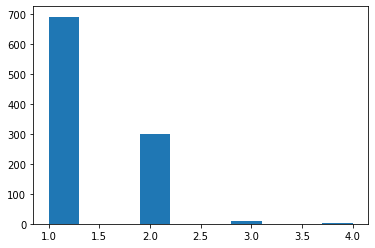

In [43]:
drive ={'drives' : np.array(["TD", "FG", "TO"]), 'probs' : np.array([3/10, 1/6, 16/30])} 

def sim_overtime_poss():
    time=0 #maybe increment this each drive
    
    #H and T represent a team (winner of coin toss, not literally heads or tails)
    
    coin = np.array(["H", "T"])
    
    ct = np.random.choice(coin)
    
    numposs = 1
    possessions = 0
    
    fgh = 0
    fgt = 0
    
    #for each possession:
        #check if the time has run out?  If not...
        #record what happened: TD, FG, or no point
        #check if the game is over based on points being scored?
        
    while time < 10:
        time = time + np.random.exponential(scale=2.4, size=None) 
        if time < 10:
            dout = np.random.choice(drive['drives'], p = drive['probs'])
            
            if ct == "H":
                if dout == "TD":
                    winner = ct
                    possessions = numposs 
                    break
                elif dout == "FG":
                    # no one scored a FG yet (MP)
                    if (fgh == 0) and (fgt == 0):
                        fgh = 1
                        numposs+=1
                        continue
                    # H scores a fg, T already scored a fg (MP)
                    elif (fgh == 0) and (fgt == 1):
                        fgh = 0
                        fgt = 0
                        numposs+=1
                        continue
                    # H already scored, H scores again (W)
                    elif (fgh == 1) and (fgt == 0):
                        winner = ct
                        possessions = numposs
                        break
                else:
                    ct = "T"
                    continue
            else:
                if dout == "TD":
                    winner = ct
                    possessions = numposs 
                    break
                elif dout == "FG":
                    # no one scored a FG yet (MP)
                    if (fgh == 0) and (fgt == 0):
                        fgt = 1
                        numposs+=1
                        continue
                    # T scores a fg, H already scored a fg (MP)
                    elif (fgh == 1) and (fgt == 0):
                        fgh = 0
                        fgt = 0
                        numposs+=1
                        continue
                    # T already scored, H scores again (W)
                    elif (fgh == 0) and (fgt == 1):
                        winner = ct
                        possessions = numposs
                        break
                    else:
                        ct = "H"
                        continue
                    
                        
        else:
            
            if fgh == 1 and fgt == 0:
                winner = "H"
                possessions = numposs
                break
            elif fgh == 0 and fgt == 1:
                winner = "T"
                possessions = numposs
                break
            else:
                winner = "TIE"
                possessions = numposs
                break
                    
    return possessions

# results = np.array([np.random.exponential(scale=2.4, size=None) for ii in range(1000)])

# I wanted the time first to determine how much time a team takes on a drive first,
        # then determining the outcome as a result. I felt that determining an outcome then
        # calculating a time was not representative of what happens in an actual game,
        # so this approach limits my poss quite a bit but in a more realistic way, as in 
        # actual games you don't really get more than 4 drives during overtime
        
results = np.array([sim_overtime_poss() for ii in range(1000)])

plt.hist(results)

**D**: Do the results match your expectation?  If not, why not?  Where are some places this model might improve?  Do you think that the duration of a possession should be independent of whether or not that possession generated points?  Should possessions in overtime follow the same distributions as the average regular-season, non-overtime possessions?

First of all, if you are the Kansas City Chiefs and you get heads during overtime you automatically win UNLESS you play the Bengals in the AFC Championchip (THANK GOD THEY GOT SMACKED).

On a more serious note,

Generally speaking this doesn't feel representative of the actual NFL experience since it only takes into account static general probabilities and is not team to team, home or away advantage (it exists, the Denver Broncos are one of many examples of a location advantage MILE HIGH), clutch factor, personel, injuries, etc. This may give a decent overview given what we are given, but the phrase "any given Sunday" still rings true, which makes the game less predicable and more interesting as a result. The duration itself is not well represented in this model, which is my biggest problem. More or less, context is extremely important in order to understand the way that teams win. This model does not count for fumbles, interceptions, safeties, strip sacks, muffed punts/kicks, or any other way a turnover can occur. It is totally possible for a possession to be literally a second (the Broncos' first possession against the Seahawks in the SB was about 0.7 seconds or the time it took for the center to hike that ball over the forehead of Peyton Manning) but the context, position on the field, turnover or not, all play a big factor in win chance. Possessions should not follow the same distributions as during the game, especially in terms of the regular season. The regular season and the playoffs are completely different, arbitrarily following that average makes no sense and shoud not interfere with overtime, which is a completely differet game. For fear of writing an essay, all I will say is that number of possessions should not play a significant role in one team beating other in overtime. That's left for regulation, overtime is special because of how it is formatted, a "all in" one shot type of situation. And also, whether or not it is fair isn't up to the NFL, 30 people need to watch Young Sheldon after so the game has to end in a timely manner rather then a fair one 